# **libraries**

In [1]:
from dataclasses import fields
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.models as km
from keras.layers import Dense, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.models import Sequential

# **Requied funcions for writing files**


In [2]:
def print_summary(file,model):
    with open(file,'w') as f : model.summary(print_fn= lambda x:f.write(x+'\n'))
def write_file(file,s):
    with open (file,'w') as f : f.write(s);
def write_np(file,np):
    file = open(file, "w+")
    content = str(np)
    file.write(content)
    file.close()
    

# Preprocessing input file

In [3]:

def process(dataset):
    with open(dataset) as f:
        file = f.readlines()
    lines = np.array(file)
    y = []
    x = []
    X_train=[]
    X_test=[]
    Y_train=[]
    Y_test=[]
    
    X_public=[]
    Y_public=[]
    dict = {
        '0':np.array([1., 0., 0., 0., 0., 0., 0.]),        
        '1':np.array([0., 1., 0., 0., 0., 0., 0.]),
        '2':np.array([0., 0., 1., 0., 0., 0., 0.]),
        '3':np.array([0., 0., 0., 1., 0., 0., 0.]),
        '4':np.array([0., 0., 0., 0., 1., 0., 0.]),
        '5':np.array([0., 0., 0., 0., 0., 1., 0.]),
        '6':np.array([0., 0., 0., 0., 0., 0., 1.])
    }
    for i in range(1, lines.size):
        ident, pixels, cat = lines[i].split(",")
        pixels = pixels.split()
        pixels = np.array(pixels, 'float32')
        ident = dict[ident]
        if('Training' in cat) :
            X_train.append(pixels)
            Y_train.append(ident)
        elif('PrivateTest' in cat):
            X_test.append(pixels)
            Y_test.append(ident)
        else :
            X_public.append(pixels)
            Y_public.append(ident)
#         y.append(ident)
#         x.append(pixels)

#     X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=100)

    #changing type
    X_train = np.array(X_train,'float32')
    Y_train = np.array(Y_train,'float32')
    X_test = np.array(X_test,'float32')
    Y_test = np.array(Y_test,'float32')    
    X_public = np.array(X_public,'float32')
    Y_public = np.array(Y_public,'float32')

    
    #normalizing
    X_train = X_train/255.
    X_test = X_test/255.
    X_public = X_public/255.
    #reshaping
    X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
    X_train = X_train.astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
    X_test = X_test.astype('float32')
    X_public = X_public.reshape(X_public.shape[0], 48, 48, 1)
    X_public = X_public.astype('float32')
    
    return X_train, X_test, Y_train, Y_test, X_public, Y_public

X_train, X_test, Y_train, Y_test, X_public, Y_public=process('../input/fer2013/fer2013.csv')
# print("\ny",Y_train.max())
write_np('x_test.txt',X_test)
write_np('y_test.txt',Y_test)
write_np('x_train.txt',X_train)
write_np('y_train.txt',Y_train)


In [4]:
#model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',
          activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#2
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

#4
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(7, activation='softmax'))

print_summary('model_summary.txt', model)
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

2022-01-15 20:22:52.903745: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 20:22:53.009942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 20:22:53.010703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-15 20:22:53.011838: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

train = model.fit(x=X_train, y=Y_train, batch_size=32, epochs=40, validation_data=(X_test, Y_test),
                  callbacks=[ModelCheckpoint(filepath='model8.h5'), ])

2022-01-15 20:22:55.931520: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40


2022-01-15 20:22:57.453464: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


898/898 [==============================] - 18s 12ms/step - loss: 1.9258 - accuracy: 0.3125 - val_loss: 1.6076 - val_accuracy: 0.3639
Epoch 2/40
898/898 [==============================] - 10s 11ms/step - loss: 1.4600 - accuracy: 0.4338 - val_loss: 1.4122 - val_accuracy: 0.4374
Epoch 3/40
898/898 [==============================] - 10s 11ms/step - loss: 1.3007 - accuracy: 0.5021 - val_loss: 1.2759 - val_accuracy: 0.5305
Epoch 4/40
898/898 [==============================] - 10s 12ms/step - loss: 1.1922 - accuracy: 0.5501 - val_loss: 1.2440 - val_accuracy: 0.5403
Epoch 5/40
898/898 [==============================] - 10s 11ms/step - loss: 1.1017 - accuracy: 0.5847 - val_loss: 1.2301 - val_accuracy: 0.5319
Epoch 6/40
898/898 [==============================] - 10s 11ms/step - loss: 1.0001 - accuracy: 0.6253 - val_loss: 1.1807 - val_accuracy: 0.5539
Epoch 7/40
898/898 [==============================] - 10s 11ms/step - loss: 0.8986 - accuracy: 0.6616 - val_loss: 1.1847 - val_accuracy: 0.5553
Epo

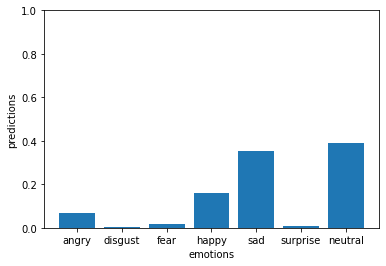

In [6]:
# img = image.load_img('input.jpg')
img = image.load_img('../input/happyf/sadkid.jpg', color_mode='grayscale', target_size=(48, 48))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
#normalize
x = x/255.
model = keras.models.load_model('model8.h5')
result = model.predict(x)

tick_label = ['angry', 'disgust', 'fear', 'happy',
              'sad', 'surprise', 'neutral']
left = [0, 1, 2, 3, 4, 5, 6]
plt.bar(left,result[0],tick_label=tick_label)
plt.xlabel('emotions')
plt.ylabel('predictions')
plt.ylim(top=1)

plt.show()

Training accuracy: 0.9859974384307861
Test accuracy: 0.6046252250671387
validation accuracy: 0.6096405386924744


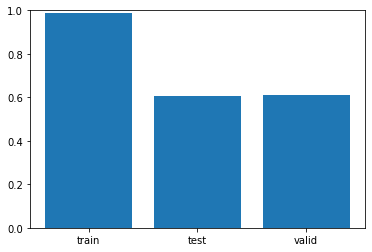

In [7]:
#Evaluation
train_score = model.evaluate(X_train, Y_train, verbose=0)
print('Training accuracy:', train_score[1])
 
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test accuracy:', test_score[1])

validation_score = model.evaluate(X_public, Y_public, verbose=0)
print('validation accuracy:', validation_score[1])

plt.bar(['train','test','valid'],[train_score[1], test_score[1], validation_score[1]])
plt.ylim(top=1)
plt.show()